# Palmer Penguins

### Step 1: Import Libraries

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Load Data

In [2]:
zip_file_path = 'Palmer Penguins Dataset.zip'  # Update with the correct path
extracted_folder = 'Palmer_Penguins_Data/'  # Folder to extract the files

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Path to the CSV file
penguins_size_file = extracted_folder + 'penguins_size.csv'

# Load the dataset
penguins_data = pd.read_csv(penguins_size_file)

# Display basic info
print("First few rows of the dataset:")
print(penguins_data.head())

print("\nColumns in the dataset:")
print(penguins_data.columns)

print("\nData types of the dataset:")
print(penguins_data.dtypes)

print("\nMissing values in the dataset:")
print(penguins_data.isnull().sum())

First few rows of the dataset:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Columns in the dataset:
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Data types of the dataset:
species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g 

### Step 3: Clean Data

In [3]:
# Handle Missing Values
# Impute missing values using species-specific medians for numerical features and mode for 'sex'
for species in penguins_data['species'].unique():
    species_data = penguins_data[penguins_data['species'] == species]
    for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
        median_value = species_data[column].median()
        penguins_data.loc[(penguins_data['species'] == species) & (penguins_data[column].isnull()), column] = median_value

# Impute missing values in 'sex' column with the mode
penguins_data['sex'] = penguins_data['sex'].fillna(penguins_data['sex'].mode()[0])

In [4]:
# Handle Outliers
# We will use Z-scores to identify outliers in the numerical columns and remove them
from scipy.stats import zscore

# Select the numerical columns for outlier detection
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate Z-scores
z_scores = np.abs(zscore(penguins_data[numerical_columns]))

# Define a threshold for outliers (typically, a Z-score greater than 3 is considered an outlier)
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).all(axis=1)

# Remove rows with outliers
penguins_data = penguins_data[~outliers]

In [5]:
# Encode Categorical Variables
# Perform one-hot encoding for the 'species' column
penguins_data_encoded = pd.get_dummies(penguins_data, columns=['species'], drop_first=True)

# Check if encoding was successful
print(penguins_data_encoded.columns)

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'species_Chinstrap', 'species_Gentoo'],
      dtype='object')


### Step 4: Visualize the Data

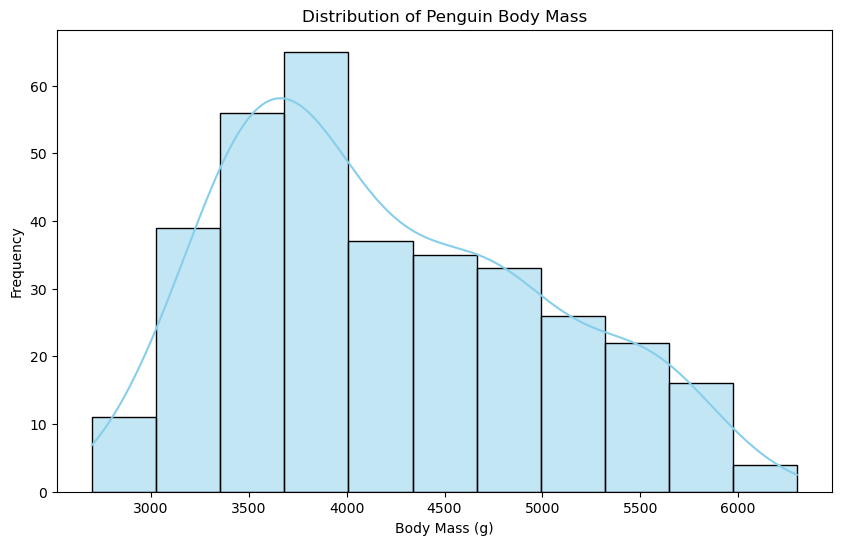

C:\Users\milto\AppData\Local\Temp\ipykernel_9184\3478865314.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species_Gentoo', y='body_mass_g', data=penguins_data_encoded, palette='Set2')


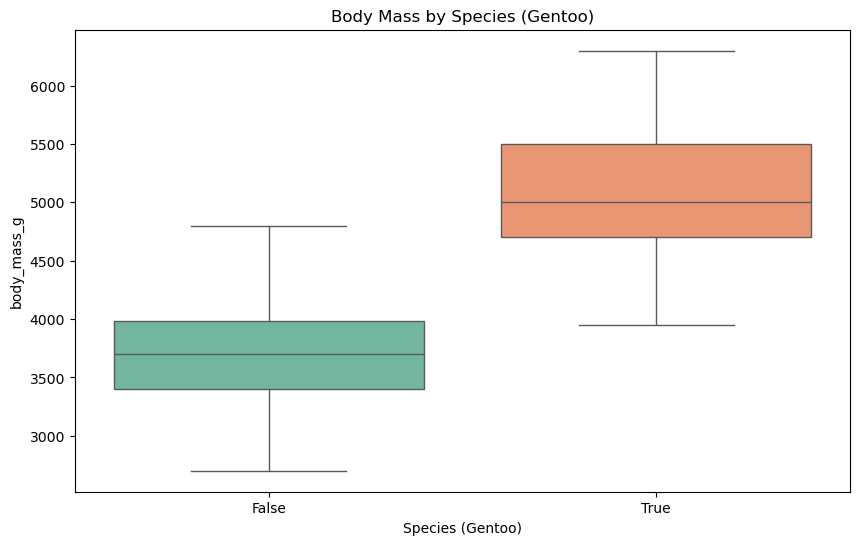

C:\Users\milto\AppData\Local\Temp\ipykernel_9184\3478865314.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species_Chinstrap', y='body_mass_g', data=penguins_data_encoded, palette='Set2')


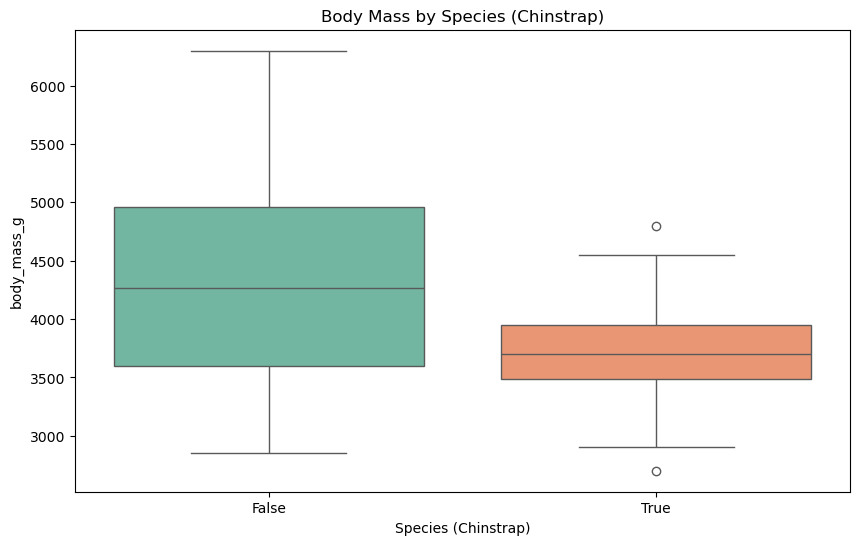

C:\Users\milto\AppData\Local\Temp\ipykernel_9184\3478865314.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=penguins_data_melted, palette='Set2')


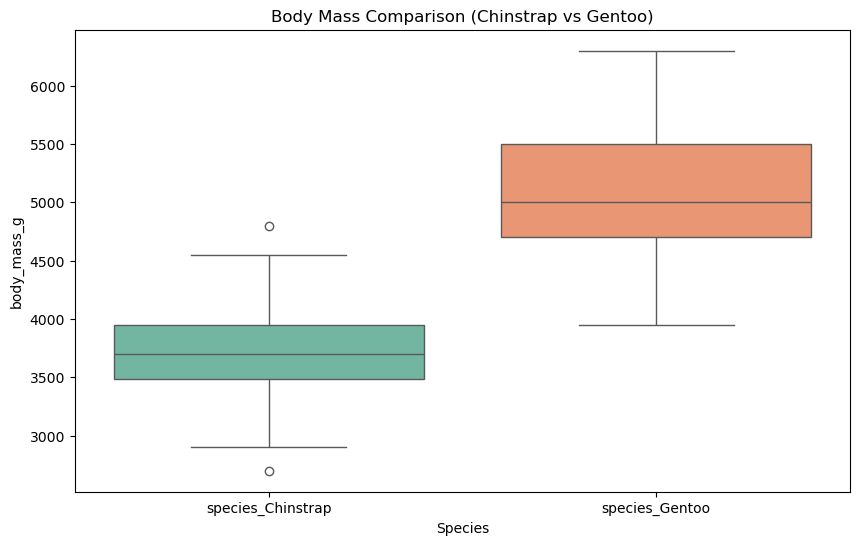


Correlation matrix after handling outliers:
                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.237777           0.657358   
culmen_depth_mm           -0.237777         1.000000          -0.585848   
flipper_length_mm          0.657358        -0.585848           1.000000   
body_mass_g                0.596326        -0.474191           0.871749   

                   body_mass_g  
culmen_length_mm      0.596326  
culmen_depth_mm      -0.474191  
flipper_length_mm     0.871749  
body_mass_g           1.000000  


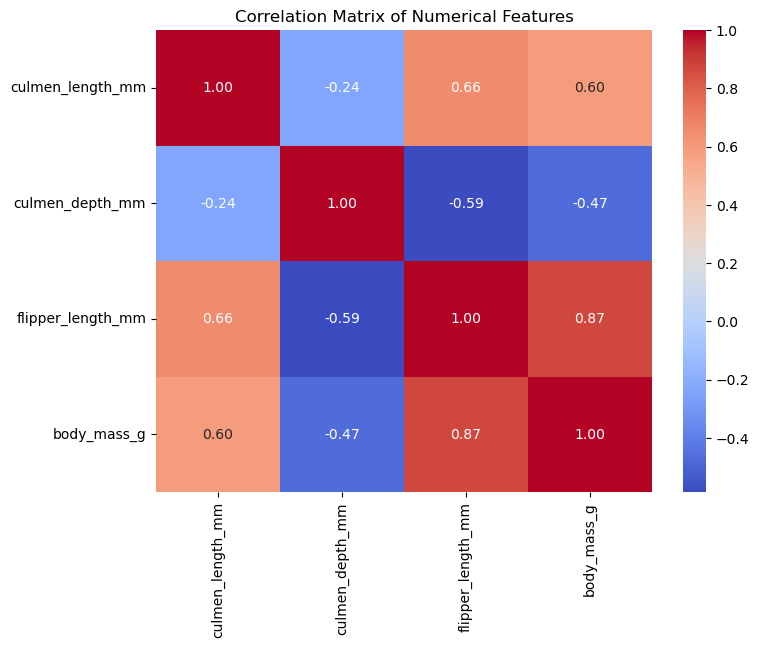

In [9]:
# Visualize the Data After Cleaning/Transformation

# Distribution of body mass after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(penguins_data['body_mass_g'], kde=True, color='skyblue')
plt.title('Distribution of Penguin Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of body mass by species (using the one-hot encoded 'species' columns)

# Plot for Gentoo
plt.figure(figsize=(10, 6))
sns.boxplot(x='species_Gentoo', y='body_mass_g', data=penguins_data_encoded, palette='Set2')
plt.title('Body Mass by Species (Gentoo)')
plt.xlabel('Species (Gentoo)')
plt.show()

# Plot for Chinstrap
plt.figure(figsize=(10, 6))
sns.boxplot(x='species_Chinstrap', y='body_mass_g', data=penguins_data_encoded, palette='Set2')
plt.title('Body Mass by Species (Chinstrap)')
plt.xlabel('Species (Chinstrap)')
plt.show()

# Melt data for comparison of both species (Chinstrap vs Gentoo)
penguins_data_melted = penguins_data_encoded.melt(
    id_vars=['body_mass_g'], 
    value_vars=['species_Chinstrap', 'species_Gentoo'], 
    var_name='species', 
    value_name='species_present'
)

# Filter for rows where species is present
penguins_data_melted = penguins_data_melted[penguins_data_melted['species_present'] == 1]

# Plot for both species (comparison)
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=penguins_data_melted, palette='Set2')
plt.title('Body Mass Comparison (Chinstrap vs Gentoo)')
plt.xlabel('Species')
plt.show()

# Correlation matrix of numerical features
correlation = penguins_data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
print("\nCorrelation matrix after handling outliers:")
print(correlation)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
# Species distribution across islands (use the one-hot encoded dataframe)
# Check if the correct one-hot encoded columns exist
species_columns = [col for col in penguins_data_encoded.columns if 'species_' in col]
print("One-hot encoded species columns:", species_columns)

# If species columns are correctly named, proceed with the groupby operation
species_island_counts = penguins_data_encoded.groupby(['island'] + species_columns).size().reset_index(name='counts')
print("\nSpecies distribution across islands:")
print(species_island_counts)

One-hot encoded species columns: ['species_Chinstrap', 'species_Gentoo']

Species distribution across islands:
      island  species_Chinstrap  species_Gentoo  counts
0     Biscoe              False           False      44
1     Biscoe              False            True     124
2      Dream              False           False      56
3      Dream               True           False      68
4  Torgersen              False           False      52


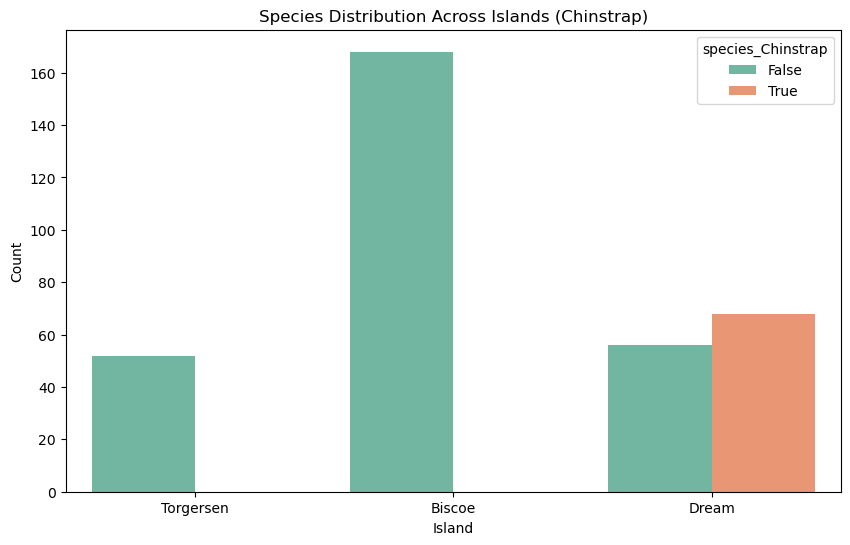

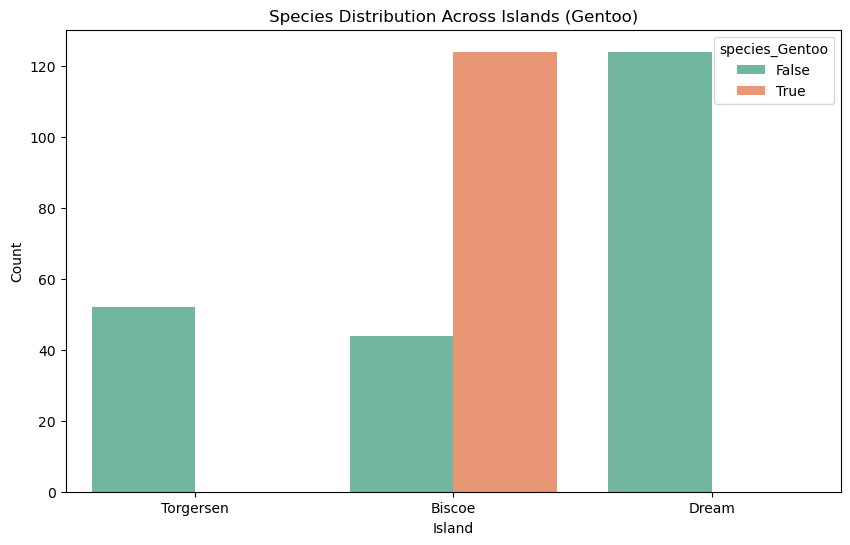

In [14]:
# Visualize species distribution across islands using the encoded species columns
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='species_Chinstrap', data=penguins_data_encoded, palette='Set2')
plt.title('Species Distribution Across Islands (Chinstrap)')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

# Alternatively, I can plot for the Gentoo species as well
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='species_Gentoo', data=penguins_data_encoded, palette='Set2')
plt.title('Species Distribution Across Islands (Gentoo)')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

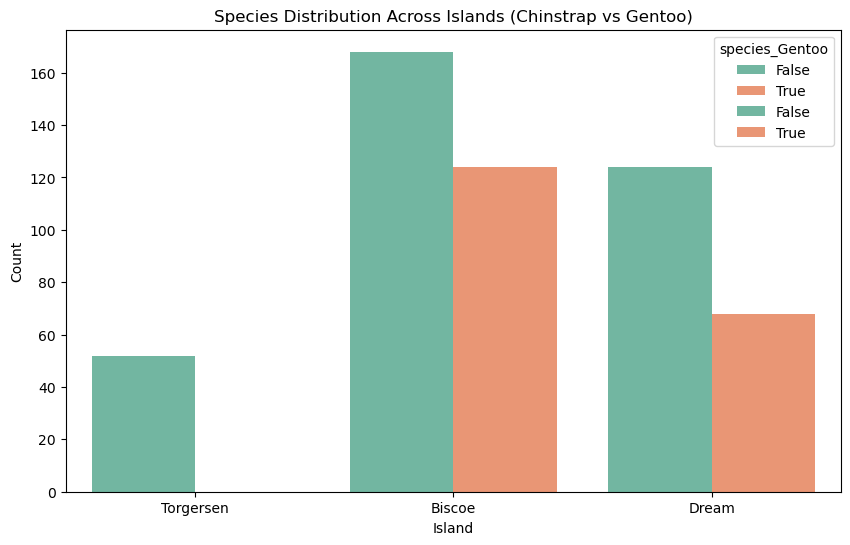

In [15]:
# Visualize both species distribution across islands
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='species_Chinstrap', data=penguins_data_encoded, palette='Set2')
sns.countplot(x='island', hue='species_Gentoo', data=penguins_data_encoded, palette='Set2')
plt.title('Species Distribution Across Islands (Chinstrap vs Gentoo)')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()
